In [1]:
from src import attributes as a
%load_ext autoreload
%autoreload 2

In [2]:
# Global Variables
stock_name = 'acy' # ticker symbol
train = 1 # 1 for train, 0 for pass
days_ahead = 5 # for predicting 1 day ahead
cv = 5 # number of cross validation folds
model_name = 'Random Forest Classifier' # for display on charts, not a tuning parameter

In [3]:
# Extract, Transform, Load, and Train Test Split
# Dictionary of IPO Dates
start_dates = {'aapl':'12/12/1980' # Updated 1/2/21 1D, 5D ahead
               , 'acy': '01/18/1998' # Updated 1/1/21 1D, 5D ahead
               , 'amd': '03/17/1980' # Updated 1/1/21
               , 'baba': '09/15/2014' # Updated 1/1/21
               , 'bac': '02/19/1973' # Updated 1/1/21
               , 'crm': '06/23/2004' # Updated 1/1/21
               , 'esgv': '09/16/2018' # Updated 1/1/21
               , 'goog': '08/16/2004' # Updated 1/1/21
               , 'ibm': '01/02/1962' # Updated 1/1/21
               , 'idex': '05/23/2007' # Updated 1/1/21
               , 'intc': '03/16/1980' # Updated 1/1/21
               , 'iyw': '05/15/2000' # Updated 1/1/21
               , 'ma': '05/21/2006' # Updated 1/1/21
               , 'msft': '03/10/1986' # Updated 1/1/21
               , 'nio': '09/10/2018' # Updated 1/1/21
               , 'nvda': '01/22/1999' # Updated 1/1/21
               , 'pypl': '07/05/2015' # Updated 1/1/21
               , 'tsla': '06/29/2010' # Updated 1/1/21
               , 'v': '03/16/2008' # Updated 1/1/21
               , 'vbiv': '09/04/2002' # Updated 1/1/21
               , 'vgt': '01/26/2004' # Updated 1/1/21
              }
X_train, X_test, y_train, y_test, stock_df = a.data(stock_name, start_dates[stock_name], days_ahead)

In [4]:
stock_df.tail(10)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction
Date,,,,,,,,,,,,
2020-12-17,2.600000,2.15,2.26,2.44,32400,2.44,-0.079646,0.209302,0.109091,0.084372,0.013012,1
2020-12-18,2.560000,2.25,2.25,2.42,33400,2.42,-0.075556,0.137778,-0.008197,0.082344,0.001890,1
2020-12-21,2.510000,2.24,2.51,2.40,23900,2.40,0.043825,0.120536,-0.008264,0.079913,0.007644,-1
2020-12-22,2.560000,2.28,2.34,2.47,26800,2.47,-0.055556,0.122807,0.029167,0.077469,0.003221,-1
2020-12-23,2.430000,2.28,2.42,2.37,23200,2.37,0.020661,0.065790,-0.040486,0.057454,0.016262,1
2020-12-24,3.160000,2.38,2.42,2.69,669300,2.69,-0.111570,0.327731,0.135021,0.068110,0.021448,-1
2020-12-28,38.040001,5.62,6.00,13.85,46768000,13.85,-1.308333,5.768684,4.148699,1.843632,0.852827,-1
2020-12-29,10.940000,7.59,9.55,9.27,3256800,9.27,0.029319,0.441370,-0.330686,1.886422,0.788343,-1
2020-12-30,9.000000,6.55,9.00,6.85,923500,6.85,0.238889,0.374046,-0.261057,1.919792,0.730298,-1


In [5]:
# GridSerach to find best hyperparameters to prevent overfitting, can be commented out once trained
if train == 1:
    a.rfc_GridSearch(X_train, y_train, stock_name, days_ahead, cv)
elif train == 0:
    pass

/home/david/.local/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [      nan       nan       nan ... 0.6726549 0.6726549 0.6726549]
  warnings.warn(


In [6]:
# Load RandomForextClassifier Model
rfc_model, y_pred, y_probs = a.rfc(X_train, X_test, y_train, stock_name, days_ahead)

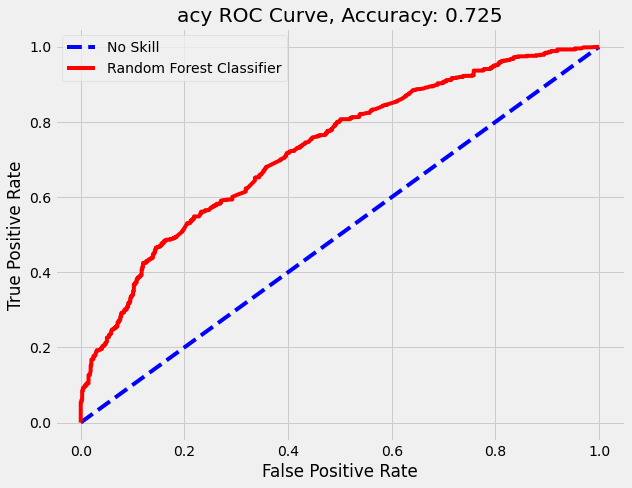

In [7]:
# ROC Curve
a.roc_plot(y_test, y_probs, stock_name, model_name)

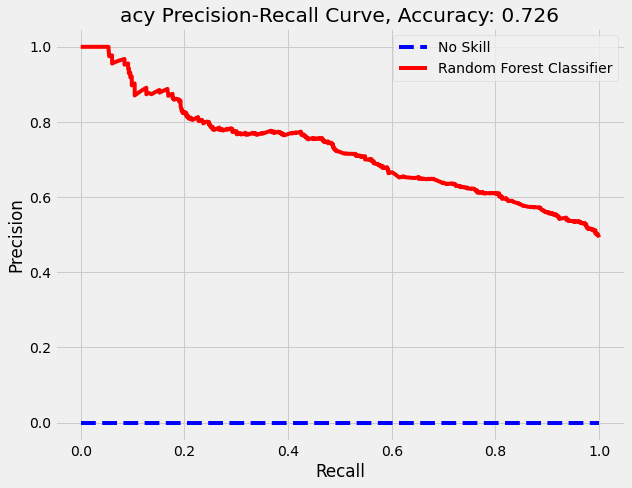

In [8]:
# Precision Recall Curve
a.prec_recall(y_test, y_probs, stock_name, model_name)

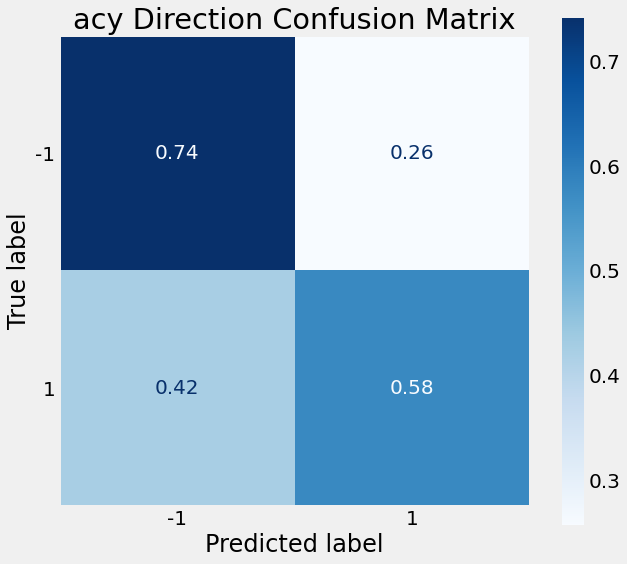

In [9]:
# Confusion Matrix
a.confusion_matrix(rfc_model, X_test, y_test, stock_name)

In [10]:
# Cross Validation
a.cross_validation(rfc_model
                   , stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']]
                   , stock_df['direction']
                   , cv = 5
                  )

'5 Fold Cross-Validation Score for First RF Model: 0.6812181232978459'

### Prediction...

In [11]:
# Prediction, use last day of data
stock_df.iloc[-1]

High          1.514000e+01
Low           6.570000e+00
Open          6.600000e+00
Close         1.075000e+01
Volume        2.597730e+07
Adj Close     1.075000e+01
oc           -6.287879e-01
hl            1.304414e+00
adj           5.693431e-01
5stdev_adj    1.877486e+00
5sma_adj      8.522640e-01
direction    -1.000000e+00
Name: 2020-12-31 00:00:00, dtype: float64

In [12]:
import numpy as np
last = stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']].iloc[-1]
last

oc           -0.628788
hl            1.304414
5stdev_adj    1.877486
5sma_adj      0.852264
Name: 2020-12-31 00:00:00, dtype: float64

In [13]:
stock_df['adj'].describe()

count    5772.000000
mean        0.001379
std         0.069379
min        -0.372197
25%        -0.013889
50%         0.000000
75%         0.013333
max         4.148699
Name: adj, dtype: float64

In [14]:
if rfc_model.predict(np.array(last).reshape(1, -1))[0] == 1:
    print(f'Buy {stock_name}')
else:
    print(f'Sell or hold {stock_name}')

Sell or hold acy


### Strategy Returns...

In [15]:
# returns on strategy column
stock_df['prediction'] = rfc_model.predict(stock_df[['oc', 'hl', '5stdev_adj', '5sma_adj']])
stock_df['returns'] = stock_df['adj'].shift(-1, fill_value = stock_df['adj'].median()) * stock_df['prediction']

In [16]:
stock_df.tail(5)

,High,Low,Open,Close,Volume,Adj Close,oc,hl,adj,5stdev_adj,5sma_adj,direction,prediction,returns
Date,,,,,,,,,,,,,,
2020-12-24,3.160000,2.38,2.42,2.69,669300,2.69,-0.111570,0.327731,0.135021,0.068110,0.021448,-1,-1,-4.148699
2020-12-28,38.040001,5.62,6.00,13.85,46768000,13.85,-1.308333,5.768684,4.148699,1.843632,0.852827,-1,-1,0.330686
2020-12-29,10.940000,7.59,9.55,9.27,3256800,9.27,0.029319,0.441370,-0.330686,1.886422,0.788343,-1,1,-0.261057
2020-12-30,9.000000,6.55,9.00,6.85,923500,6.85,0.238889,0.374046,-0.261057,1.919792,0.730298,-1,1,0.569343
2020-12-31,15.140000,6.57,6.60,10.75,25977300,10.75,-0.628788,1.304414,0.569343,1.877486,0.852264,-1,-1,-0.000000


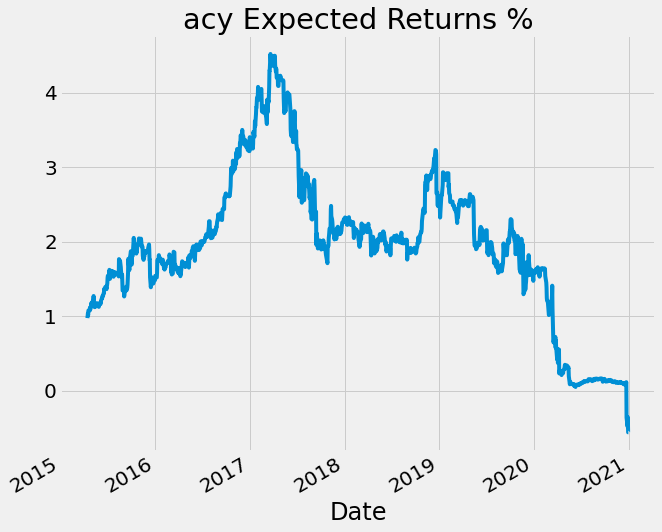

In [17]:
# Don't trade every day!
import matplotlib.pyplot as plt
test_length = len(y_test)
(stock_df['returns'][-test_length:] + 1).cumprod().plot()
plt.title(f'{stock_name} Expected Returns %');

In [18]:
# Model returns if bought on predictions of 1
returns_on_ones = []
for idx in range(-test_length, 0):
    if stock_df['prediction'][idx] == 1:
        returns_on_ones.append(1 + stock_df['returns'][idx])

returns = 1
for x in returns_on_ones:
    returns *= x
returns

0.4952257065312059

In [19]:
# multiple times original investment, not bad but...

In [20]:
# If purchased in 2012 and left it until now
test_idx = int(len(stock_df)*0.75)
(stock_df['Close'][-1] - stock_df['Close'][-test_idx]) / stock_df['Close'][-test_idx]

2.0539772892755663

In [21]:
# Buy and hold strategy beats RandomForestClassifier in this study

# Special thanks to Shagufta Tahsildar at https://blog.quantinsti.com/random-forest-algorithm-in-python/